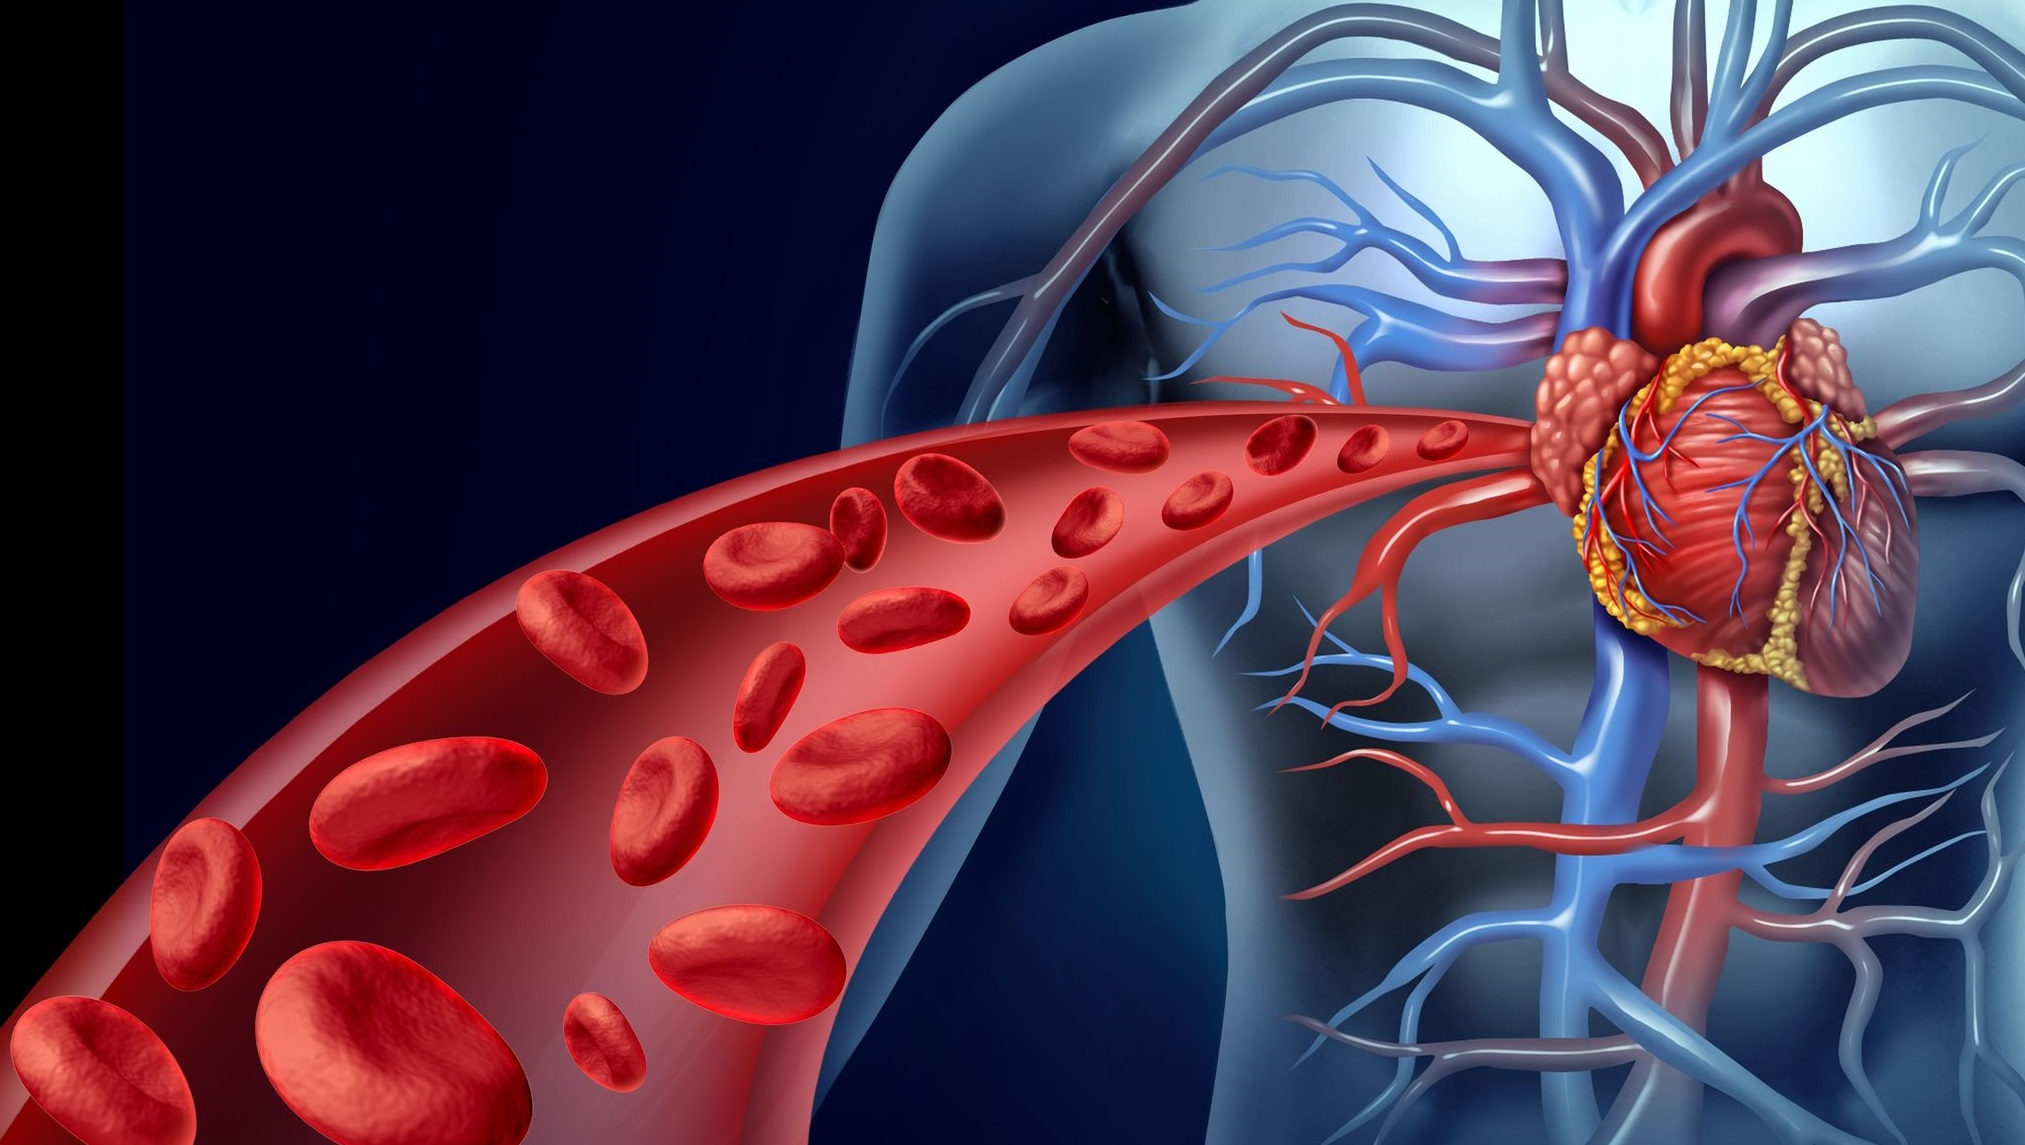

# Cardio Disease Classification

# Notebook 3 - classification:

### Content:
Features:

age | int (days)  
height | int (cm)   
weight | float (kg)   
gender | categorical code   
Systolic | ap_hi | int   
Diastolic | ap_lo | int   
Cholesterol |  1: normal, 2: above normal, 3: well above normal   
Glucose | 1: normal, 2: above normal, 3: well above normal   
Smoking | binary   
Alcohol intake | binary   
Physical activity | binary   
Presence or absence of cardiovascular disease |binary   
## to get the most from our data we will make 2 more features wich will be explained later. 


kaggle link - https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

## Imports and read form csv:

In [696]:
# Basic imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# preprocessing and split
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# Scores and reports
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
df = pd.read_csv('data/data.csv')


## Basic info:

In [697]:
df.shape

(70000, 14)

In [698]:
df.head()

id  age_days   age_year  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0   0     18393  50.391781       2     168    62.0    110     80            1   
1   1     20228  55.419178       1     156    85.0    140     90            3   
2   2     18857  51.663014       1     165    64.0    130     70            3   
3   3     17623  48.282192       2     169    82.0    150    100            1   
4   4     17474  47.873973       1     156    56.0    100     60            1   

   gluc  smoke  alco  active  cardio  
0     1      0     0       1       0  
1     1      0     0       1       1  
2     1      0     0       0       1  
3     1      0     0       1       1  
4     1      0     0       0       0

In [699]:
df.tail()

id  age_days   age_year  gender  height  weight  ap_hi  ap_lo  \
69995  99993     19240  52.712329       2     168    76.0    120     80   
69996  99995     22601  61.920548       1     158   126.0    140     90   
69997  99996     19066  52.235616       2     183   105.0    180     90   
69998  99998     22431  61.454795       1     163    72.0    135     80   
69999  99999     20540  56.273973       1     170    72.0    120     80   

       cholesterol  gluc  smoke  alco  active  cardio  
69995            1     1      1     0       1       0  
69996            2     2      0     0       1       1  
69997            3     1      0     1       0       1  
69998            1     2      0     0       0       1  
69999            2     1      0     0       1       0

In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age_days     70000 non-null  int64  
 2   age_year     70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [701]:
df.isna().sum()

id             0
age_days       0
age_year       0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no null values!  
And all the values are numeric.

## Preproces Data:

### Clean the data

#### We can see that there are some unnecessary columns, so we can throw them

In [702]:
# Drop id col
df.drop(['id'], axis = 1, inplace= True)
# Round float
df['age_year'] = df['age_year'].round(0)
df['weight'] = df['weight'].round(0)
# There are some errors in the data ap_hi always biger then ap_lo 
# lats drop this errors:
df = df[df['ap_lo']<df['ap_hi']]

df.reset_index()

index  age_days  age_year  gender  height  weight  ap_hi  ap_lo  \
0          0     18393      50.0       2     168    62.0    110     80   
1          1     20228      55.0       1     156    85.0    140     90   
2          2     18857      52.0       1     165    64.0    130     70   
3          3     17623      48.0       2     169    82.0    150    100   
4          4     17474      48.0       1     156    56.0    100     60   
...      ...       ...       ...     ...     ...     ...    ...    ...   
68759  69995     19240      53.0       2     168    76.0    120     80   
68760  69996     22601      62.0       1     158   126.0    140     90   
68761  69997     19066      52.0       2     183   105.0    180     90   
68762  69998     22431      61.0       1     163    72.0    135     80   
68763  69999     20540      56.0       1     170    72.0    120     80   

       cholesterol  gluc  smoke  alco  active  cardio  
0                1     1      0     0       1       0  
1                3     1      0     0       1       1  
2                3     1      0     0       0       1  
3                1     1      0     0       1       1  
4                1     1      0     0       0       0  
...            ...   ...    ...   ...     ...     ...  
68759            1     1      1     0       1       0  
68760            2     2      0     0       1       1  
68761            3     1      0     1       0       1  
68762            1     2      0     0       0       1  
68763            2     1      0     0       1       0  

[68764 rows x 14 columns]

In [703]:
df

age_days  age_year  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0         18393      50.0       2     168    62.0    110     80            1   
1         20228      55.0       1     156    85.0    140     90            3   
2         18857      52.0       1     165    64.0    130     70            3   
3         17623      48.0       2     169    82.0    150    100            1   
4         17474      48.0       1     156    56.0    100     60            1   
...         ...       ...     ...     ...     ...    ...    ...          ...   
69995     19240      53.0       2     168    76.0    120     80            1   
69996     22601      62.0       1     158   126.0    140     90            2   
69997     19066      52.0       2     183   105.0    180     90            3   
69998     22431      61.0       1     163    72.0    135     80            1   
69999     20540      56.0       1     170    72.0    120     80            2   

       gluc  smoke  alco  active  cardio  
0         1      0     0       1       0  
1         1      0     0       1       1  
2         1      0     0       0       1  
3         1      0     0       1       1  
4         1      0     0       0       0  
...     ...    ...   ...     ...     ...  
69995     1      1     0       1       0  
69996     2      0     0       1       1  
69997     1      0     1       0       1  
69998     2      0     0       0       1  
69999     1      0     0       1       0  

[68764 rows x 13 columns]

### Add features

#### BMI - 
```"BMI is a convenient rule of thumb used to broadly categorize a person as underweight, normal weight, overweight, or obese based on tissue mass (muscle, fat, and bone) and height." - wikipedia```

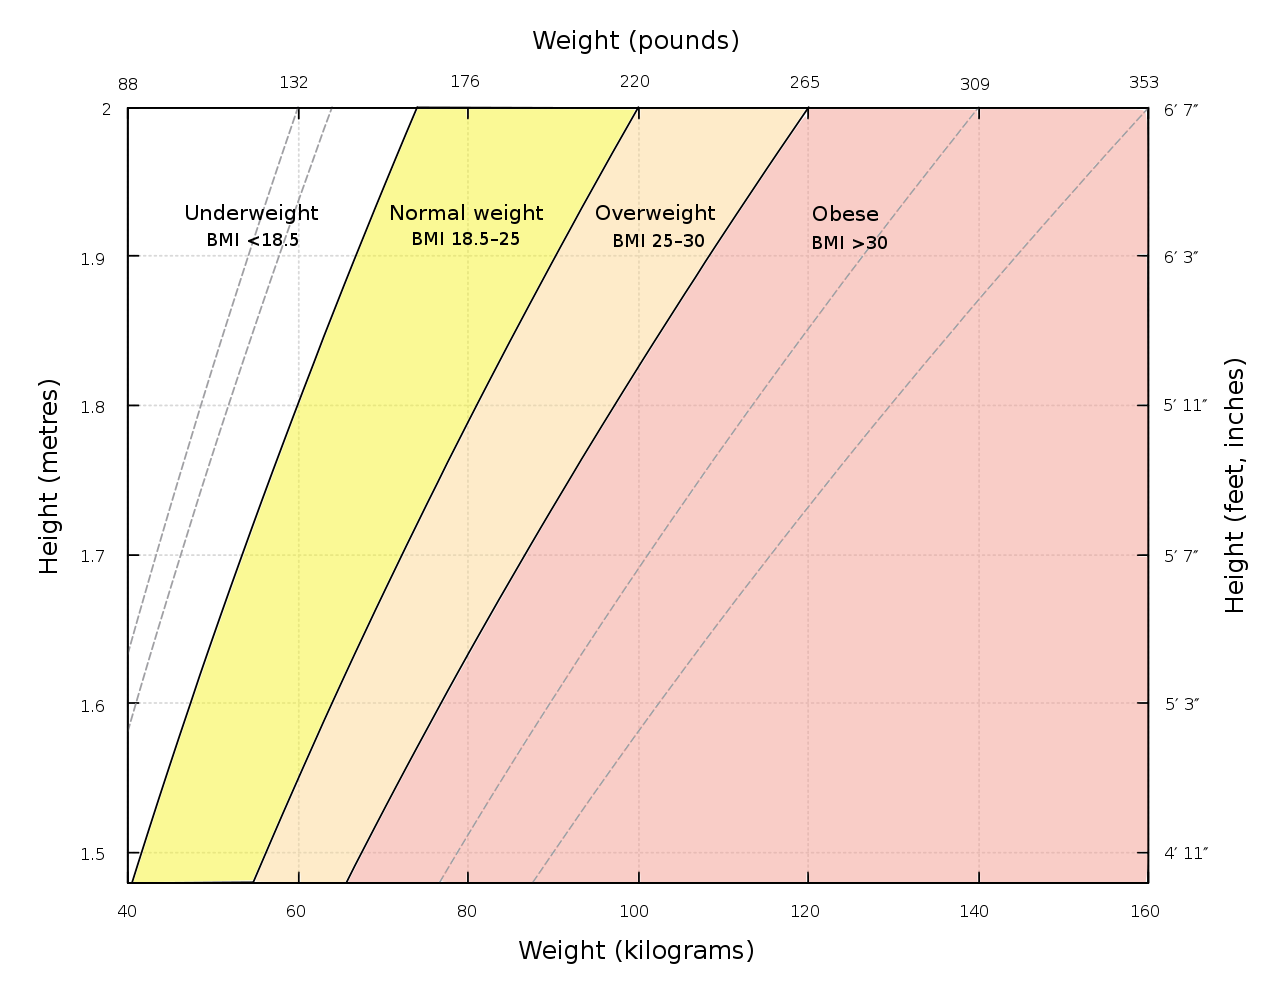

In [704]:
# add BMI:
df['BMI'] = (df["weight"] / (df["height"]/100)**2).astype(np.int)

#### MAP - 
```"The mean arterial pressure (MAP) is an average blood pressure in an individual during a single cardiac cycle." - wikipedia```

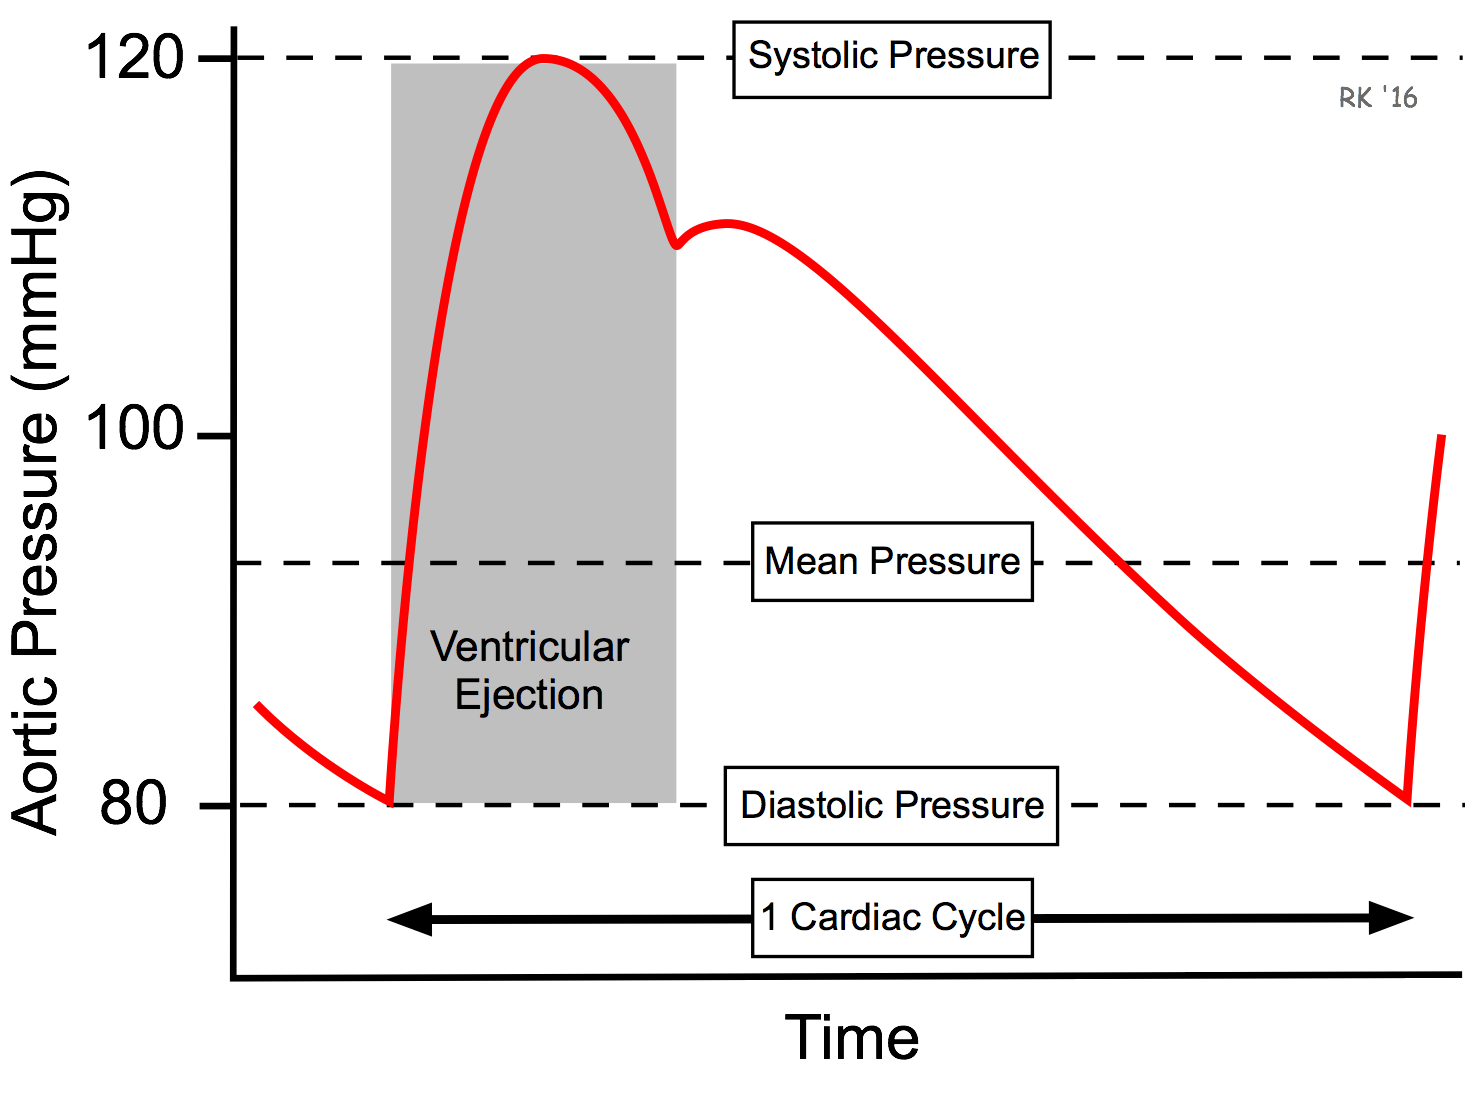

In [705]:
# add MAP:
df['MAP'] = (((df["ap_lo"]*2) + df["ap_hi"])/3).round(0)

Our new dataframe:

In [706]:
df.head()

age_days  age_year  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0     18393      50.0       2     168    62.0    110     80            1   
1     20228      55.0       1     156    85.0    140     90            3   
2     18857      52.0       1     165    64.0    130     70            3   
3     17623      48.0       2     169    82.0    150    100            1   
4     17474      48.0       1     156    56.0    100     60            1   

   gluc  smoke  alco  active  cardio  BMI    MAP  
0     1      0     0       1       0   21   90.0  
1     1      0     0       1       1   34  107.0  
2     1      0     0       0       1   23   90.0  
3     1      0     0       1       1   28  117.0  
4     1      0     0       0       0   23   73.0

## Visualization:

### Lets see how the data split between the class

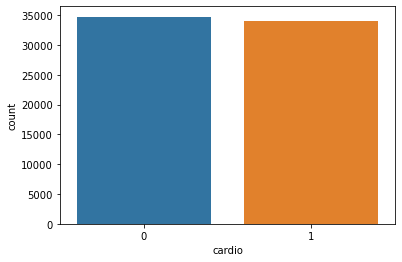

In [707]:
sns.countplot(df['cardio']) # count the number of patients with or witout cardio.

### The number of patients is divided almost equally!

### Now lats correlation between features:

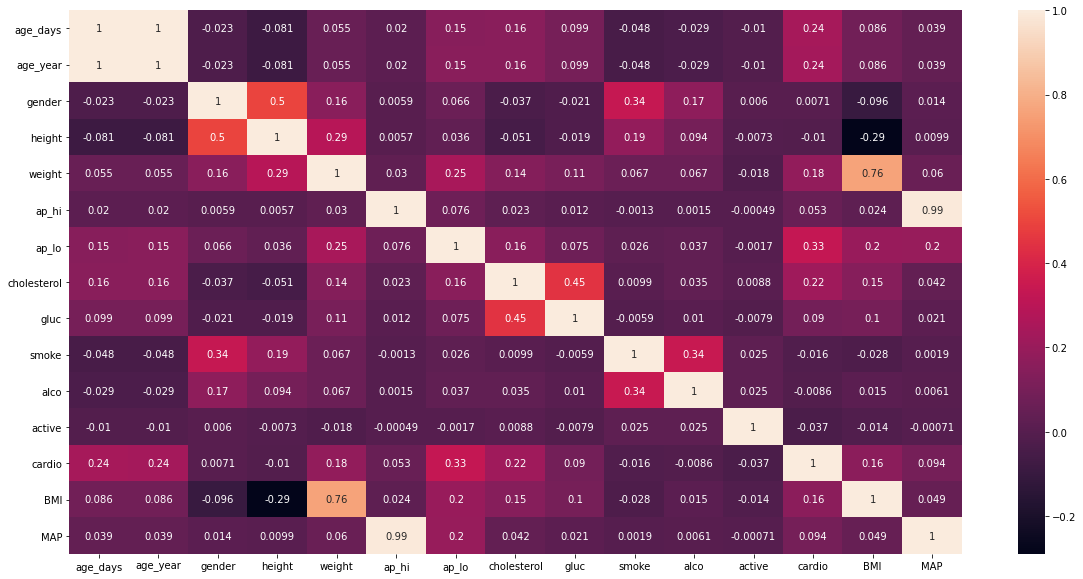

In [708]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

### At first glance we can't find strong correlation between features

## Lets test every featur by itself:

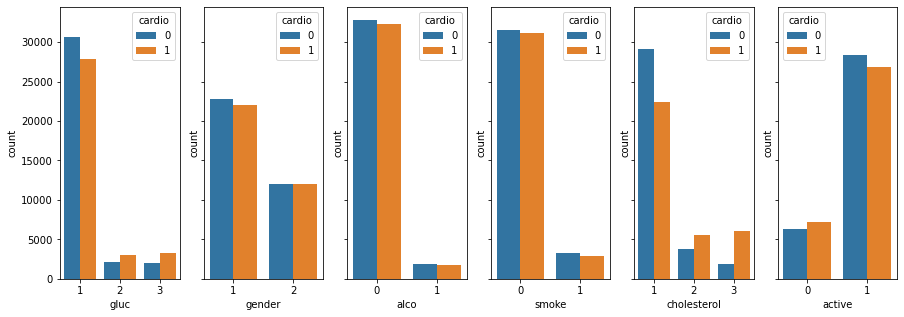

In [709]:
f, axes = plt.subplots(1, 6, figsize=(15, 5), sharex=False,sharey=True)
sns.countplot(x='gluc',data=df,hue='cardio' , ax=axes[0])
sns.countplot(x='gender',data=df,hue='cardio', ax=axes[1] )
sns.countplot(x='alco',data=df,hue='cardio' , ax=axes[2])
sns.countplot(x='smoke',data=df,hue='cardio' , ax=axes[3])
sns.countplot(x='cholesterol',data=df,hue='cardio', ax=axes[4])
sns.countplot(x='active',data=df,hue='cardio' , ax=axes[5])


We can see that our intuition is pretty good apart from the smoking and alcohol that behave differently than expected.

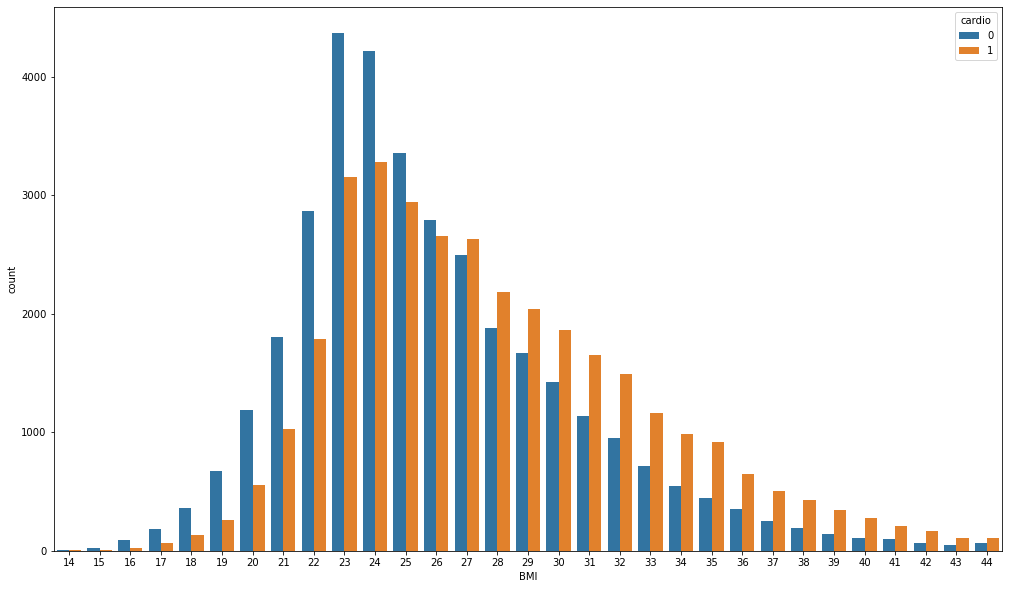

In [710]:
plt.figure(figsize=(17,10))
sns.countplot(data = df[(df['BMI'] < 45) & (df['BMI'] > 13) ], x='BMI', hue='cardio')
plt.show()

 It can be seen that as the BMI increases the number of cardio increases

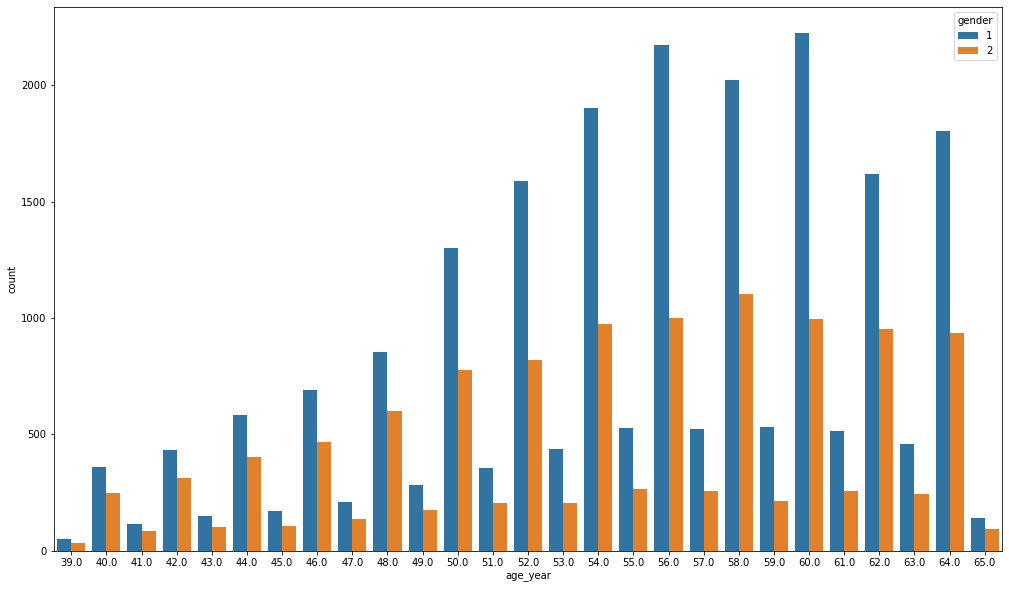

In [711]:
plt.figure(figsize=(17,10))
sns.countplot(data = df[(df['cardio'] == 1)], x='age_year' ,hue='gender')
plt.show()

It can be seen that as age increases there are more cardio disease. and men are sicker than women and at an earlier age.

Now we can drop 'age_year' because it's less specific from 'age_days'

In [712]:
df.drop(['age_year'], axis = 1, inplace= True)

## Models:

In [713]:
# Split Data
y = df['cardio']
x = df.drop(['cardio'], axis =1)

#split x and y to trin and test
x_train , x_test , y_train , y_test = split(x,y ,train_size = 0.8 , shuffle = True , random_state = 1)

#scal data
scal_x_train = pd.DataFrame(StandardScaler().fit(x_train).transform(x_train),columns=x.columns)
scal_x_test = pd.DataFrame(StandardScaler().fit(x_train).transform(x_test),columns=x.columns)
scal_x = pd.DataFrame(StandardScaler().fit(x).transform(x),columns=x.columns)

## searching for optimal value of K for knn, with Cross validation score (I will explain later what Cross validation is):

In [714]:
k_range = [10,50,100,200]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    Optional_K = cross_val_score(knn, scal_x, y, cv=10)
    k_scores.append(Optional_K.mean())
    print('.')
print(k_scores)

.
.
.
.
[0.6867110529292954, 0.7029549540107345, 0.7030858863586821, 0.701951579922215]


Text(0, 0.5, 'Cross validated score')

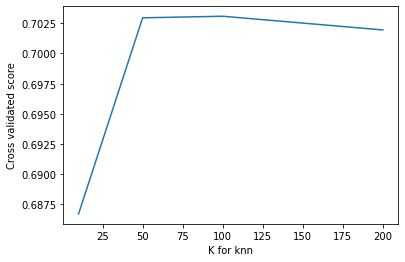

In [715]:
plt.plot(k_range, k_scores)
plt.xlabel('K for knn')
plt.ylabel('Cross validated score')

K = 100 is optimal!

## Modeling: 

In [716]:
KNN = KNeighborsClassifier(n_neighbors=100).fit(scal_x_train, y_train)
LR = LogisticRegression().fit(scal_x_train, y_train)
Dummy = DummyClassifier(strategy='most_frequent').fit(scal_x_train, y_train)

### Lats test our models:

In [717]:
# Simpel score test:
print("KNeighborsClassifier mean accuracy: {:.2f}%".format(KNN.score(scal_x_test, y_test)*100))
print("LogisticRegression mean accuracy: {:.2f}%".format(LR.score(scal_x_test, y_test)*100))
print("DummyClassifier mean accuracy: {:.2f}%".format(Dummy.score(scal_x_test, y_test)*100))


KNeighborsClassifier mean accuracy: 70.41%
LogisticRegression mean accuracy: 71.95%
DummyClassifier mean accuracy: 50.83%


In [718]:
# List of all model and there names:
model = [(Dummy, "DummyClassifier"), (LR, "LogisticRegression"),(KNN, "KNeighborsClassifier")]

### Cross validation score:

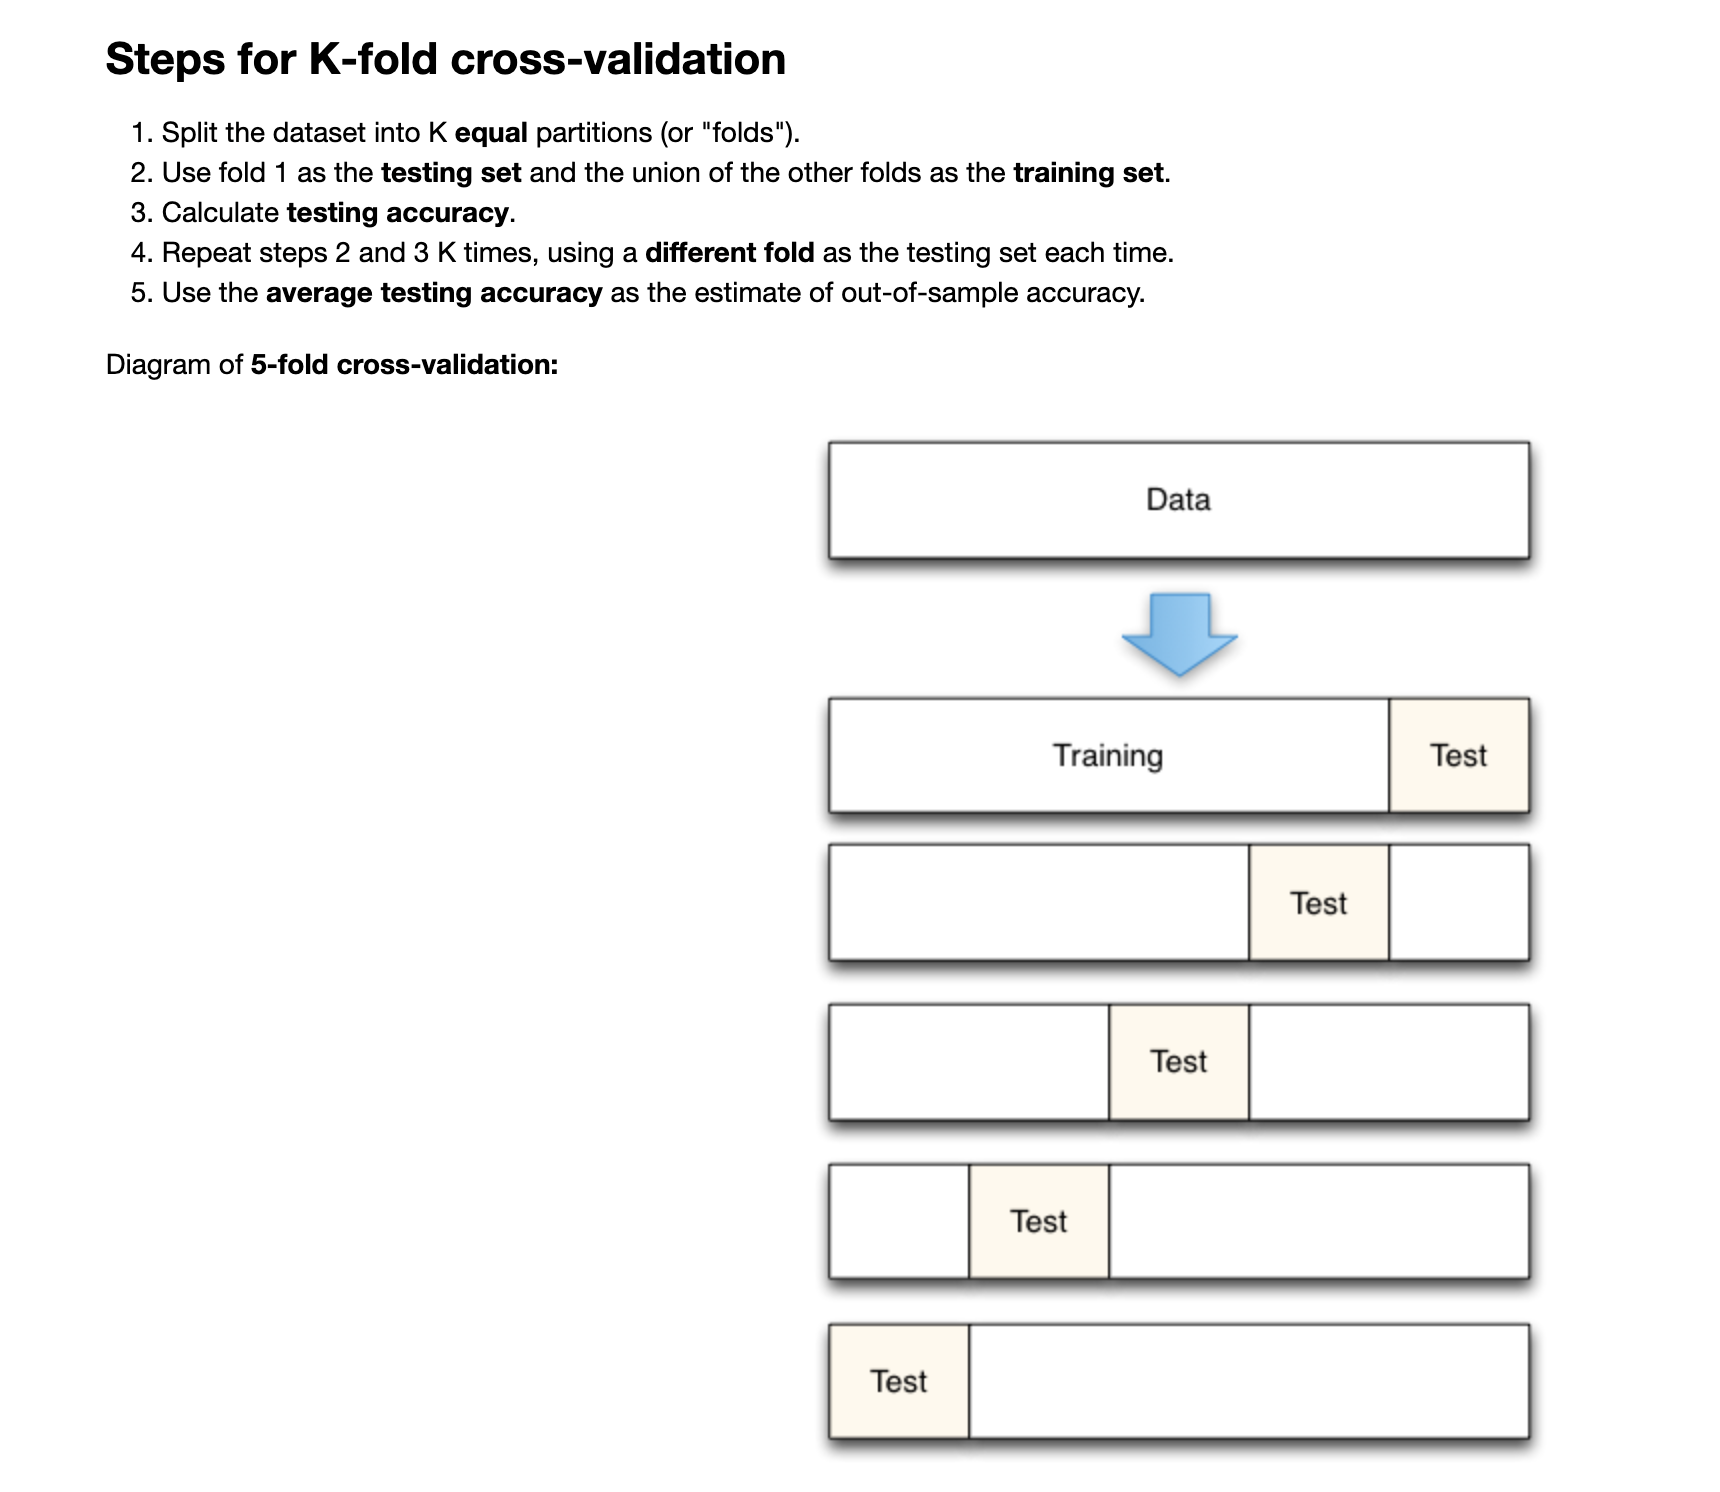

Taken from: ```https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb```

In [719]:
for i,j in model:
    cv_score = cross_val_score(i, scal_x, y, cv=10)
    print(j, "cross val score is:", cv_score.mean())

DummyClassifier cross val score is: 0.5052352975659817
LogisticRegression cross val score is: 0.7215257935858397
KNeighborsClassifier cross val score is: 0.7030858863586821


### classification report and confusion matrix:

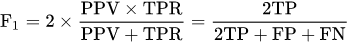

DummyClassifier  Classification Report
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      6990
           1       0.00      0.00      0.00      6763

    accuracy                           0.51     13753
   macro avg       0.25      0.50      0.34     13753
weighted avg       0.26      0.51      0.34     13753



/Users/ortrabelsi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


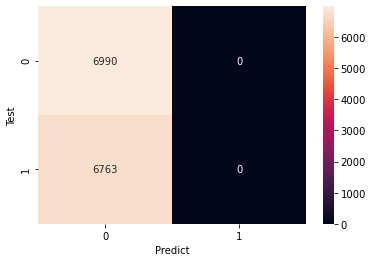

LogisticRegression  Classification Report
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      6990
           1       0.74      0.67      0.70      6763

    accuracy                           0.72     13753
   macro avg       0.72      0.72      0.72     13753
weighted avg       0.72      0.72      0.72     13753



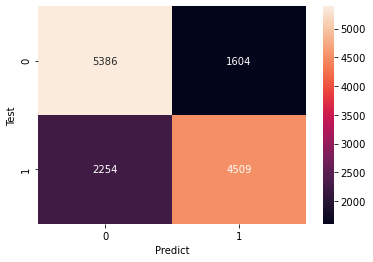

KNeighborsClassifier  Classification Report
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      6990
           1       0.72      0.65      0.68      6763

    accuracy                           0.70     13753
   macro avg       0.71      0.70      0.70     13753
weighted avg       0.71      0.70      0.70     13753



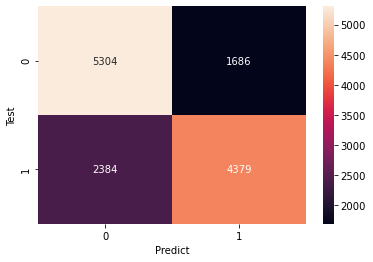

In [720]:
for i , j in model:
    train_pred = i.predict(scal_x_train)
    y_pred = i.predict(scal_x_test)

    
    print( j,' Classification Report')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.subplots()
    sns.heatmap(cm,fmt=".0f", annot=True)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.show()

## ROC curve and AUC:

### The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 
### The larger the area under the curve (AUC) the better!

$$\text{TPR} = \frac{TP}{TP + FN}$$  
$$\text{FPR} = \frac{FP}{TN + FP}$$  
$$\mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}$$

Text(0, 0.5, 'True Positive Rate')

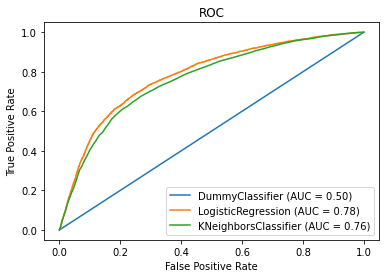

In [721]:
#ROC curves
plot = plt.subplot(title = 'ROC')
plot_roc_curve(Dummy,scal_x_test, y_test, ax = plot, name= 'DummyClassifier')
plot_roc_curve(LR,scal_x_test, y_test, ax = plot, name= 'LogisticRegression')
plot_roc_curve(KNN,scal_x_test, y_test, ax = plot, name= 'KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


# Logistic Regression model is the best for this case